# データの読み込み

In [45]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pandas as pd

In [47]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [49]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

In [50]:
import datetime

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
pd.read_excel('drive/MyDrive/fresh-vegetable-price-forecast-nishika/data_explanation.xlsx', sheet_name=0)

,ファイル名,内容
0,train.csv,訓練用データ
1,test.csv,評価用データ
2,weather.csv,天候データ
3,sample_submission.csv,投稿データフォーマット


In [53]:
pd.read_excel('drive/MyDrive/fresh-vegetable-price-forecast-nishika/data_explanation.xlsx', sheet_name=1)

,ファイル名,カラム名,内容
0,train.csv,kind,野菜の種類
1,NaN,date,日付
2,NaN,amount,卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3,NaN,mode_price,卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
5,test.csv,kind,野菜の種類
6,NaN,date,日付
7,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
8,weather.csv,date,日付
9,NaN,mean_temp,平均気温（℃）


In [54]:
import openpyxl
data_exp = openpyxl.load_workbook('drive/MyDrive/fresh-vegetable-price-forecast-nishika/data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [55]:
train_raw = pd.read_csv('drive/MyDrive/fresh-vegetable-price-forecast-nishika/train.csv')
train_raw

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [56]:
test_raw = pd.read_csv('drive/MyDrive/fresh-vegetable-price-forecast-nishika/test.csv')
test_raw

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [57]:
weather_raw = pd.read_csv('drive/MyDrive/fresh-vegetable-price-forecast-nishika/weather.csv')
weather_raw

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [58]:
sub_raw = pd.read_csv('drive/MyDrive/fresh-vegetable-price-forecast-nishika/sample_submission.csv')
sub = sub_raw.copy()
sub

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


## trainデータ

### dateをdatetime型に変換

In [59]:
train = train_raw.copy()

In [60]:
train['date'] = train['date'].astype(str)

In [61]:
train['date'] = pd.to_datetime(train['date'])

## testデータ

### dateをdatetime型に変換

In [62]:
test = test_raw.copy()

In [63]:
test['date'] = test['date'].astype(str)
test['date'] = pd.to_datetime(test['date'])

## weatherデータ

### dateをdatetime型に変換

In [64]:
weather = weather_raw.copy()

In [65]:
weather['date'] = weather['date'].astype(str)
weather['date'] = pd.to_datetime(weather['date'])

# Prophet

## ライブラリ読み込み

In [66]:
pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [68]:
df = train[["date","kind","mode_price"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        97782 non-null  datetime64[ns]
 1   kind        97782 non-null  object        
 2   mode_price  97782 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.2+ MB


## for文で予測値出力、プロット

だいこん


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


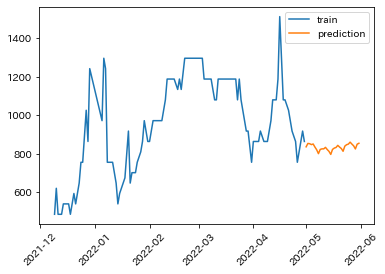

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


にんじん


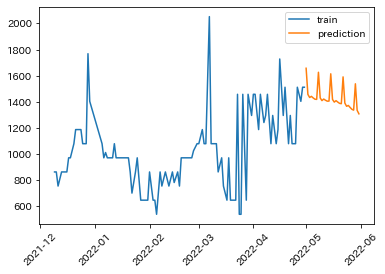

キャベツ


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


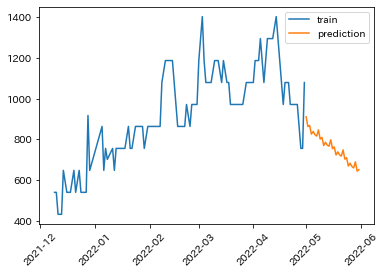

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


レタス


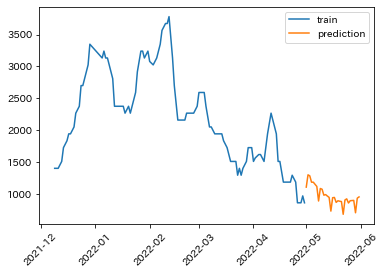

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


はくさい


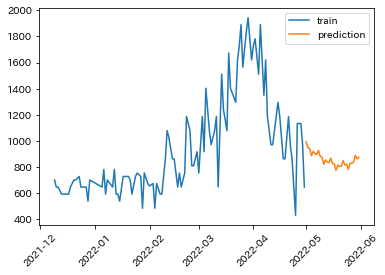

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


こまつな


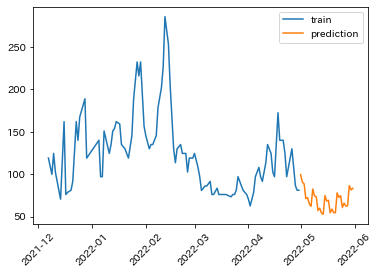

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ほうれんそう


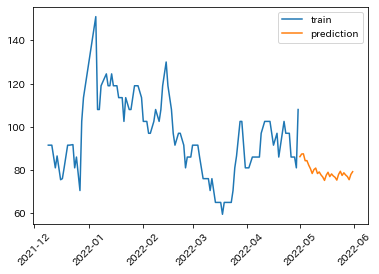

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ねぎ


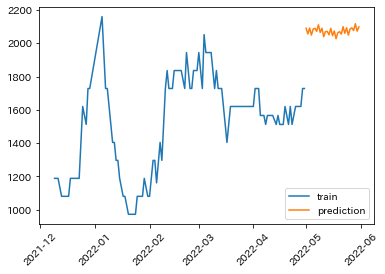

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


きゅうり


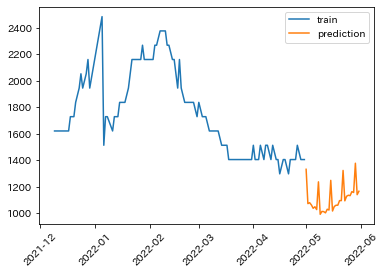

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


トマト


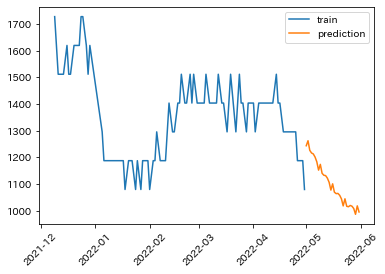

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ピーマン


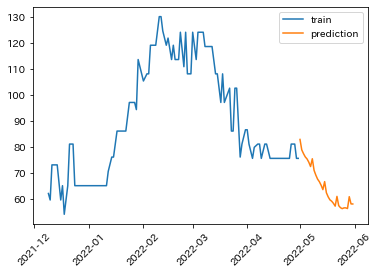

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


じゃがいも


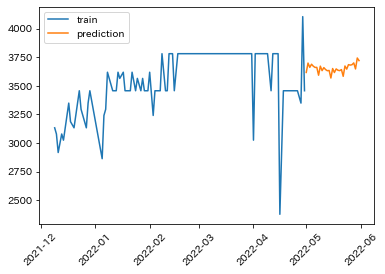

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


なましいたけ


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


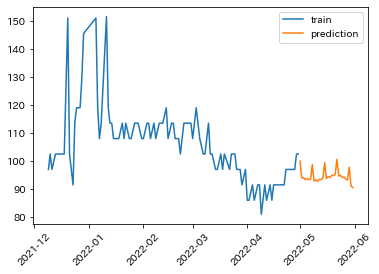

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


セルリー


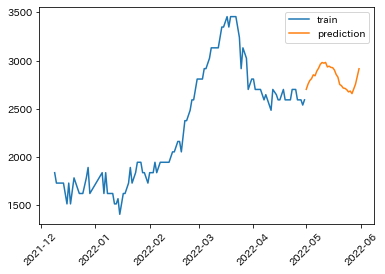

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


そらまめ


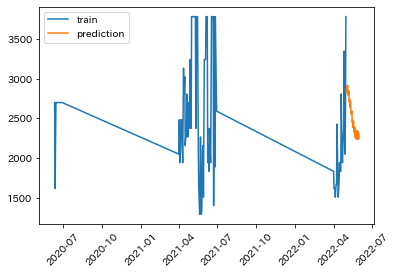

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ミニトマト


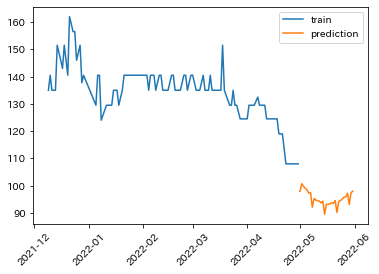

In [69]:
cols = ["kind","date","mode_price"]
df_pred = pd.DataFrame(columns=cols)

for kind_name in test["kind"].unique():
  print(kind_name)
  df_kind = df[df["kind"]==kind_name]
  df_kind = df_kind[["date","mode_price"]]
  df_kind = df_kind.rename(columns={"date":"ds","mode_price":"y"})
  m = Prophet()
  m.fit(df_kind)
  future = m.make_future_dataframe(31, freq='D')
  forecast = m.predict(future)
  forecast_kind = forecast.tail(31)
  forecast_kind = forecast_kind[["ds","yhat"]]
  forecast_kind["kind"] = kind_name
  forecast_kind = forecast_kind.rename(columns={"ds":"date","yhat":"mode_price"})

  plt.figure()
  plt.plot(df_kind.set_index("ds").tail(100)[["y"]])
  plt.plot(forecast_kind.set_index("date")[["mode_price"]])
  plt.xticks(rotation=45)
  plt.legend(["train","prediction"])
  plt.show()

  df_pred = df_pred.append(forecast_kind, ignore_index=True)

In [70]:
df_pred

,kind,date,mode_price
0,だいこん,2022-05-01,836.207556
1,だいこん,2022-05-02,853.775550
2,だいこん,2022-05-03,852.390270
3,だいこん,2022-05-04,847.696723
4,だいこん,2022-05-05,850.905418
...,...,...,...
491,ミニトマト,2022-05-27,95.853024
492,ミニトマト,2022-05-28,97.241873
493,ミニトマト,2022-05-29,93.091938
494,ミニトマト,2022-05-30,97.441669


In [71]:
sub['date'] = sub['date'].astype(str)
sub

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [72]:
df_pred_sub = df_pred.copy()
df_pred_sub['date'] = df_pred_sub['date'].astype(str)
df_pred_sub['date'] = df_pred_sub.date.apply(lambda x: x.replace('-', ''))
df_pred_sub

,kind,date,mode_price
0,だいこん,20220501,836.207556
1,だいこん,20220502,853.775550
2,だいこん,20220503,852.390270
3,だいこん,20220504,847.696723
4,だいこん,20220505,850.905418
...,...,...,...
491,ミニトマト,20220527,95.853024
492,ミニトマト,20220528,97.241873
493,ミニトマト,20220529,93.091938
494,ミニトマト,20220530,97.441669


In [73]:
df_result = pd.merge(sub.drop("mode_price", axis=1), df_pred_sub, how="left", on=["kind", "date"])
df_result

,kind,date,mode_price
0,だいこん,20220502,853.775550
1,だいこん,20220506,835.035522
2,だいこん,20220507,820.898149
3,だいこん,20220509,822.616543
4,だいこん,20220510,825.684007
...,...,...,...
315,ミニトマト,20220526,95.767513
316,ミニトマト,20220527,95.853024
317,ミニトマト,20220528,97.241873
318,ミニトマト,20220530,97.441669


## CSVファイル出力

In [74]:
df_result.to_csv("drive/MyDrive/fresh-vegetable-price-forecast-nishika/result_prophet.csv", index=False, encoding="utf_8_sig")